<a href="https://colab.research.google.com/github/MargarytaKyian/AiLabCollegeKyian/blob/main/LabAI3_4Kyian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy of the new classifier = 33.33 %



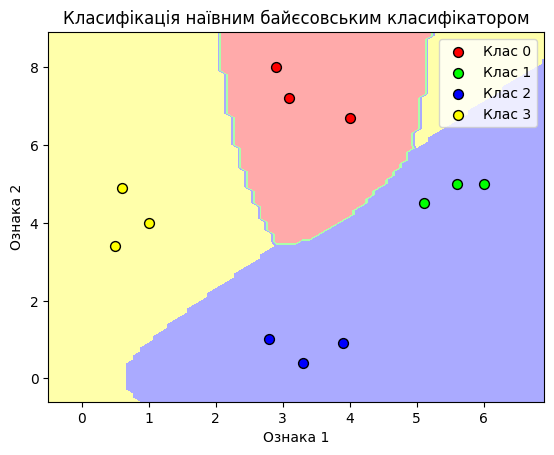


Accuracy: 75.00%
Precision: 65.28%
Recall: 75.00%
F1: 68.06%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
# Лаб.№3-4 ШІ. Киян М. ІПЗ-407
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Визначення зразка вхідних даних (X) та їх міток (y)
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5],
              [6, 5], [5.6, 5], [3.3, 0.4],
              [3.9, 0.9], [2.8, 1],
              [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])  # Визначення класів

# Розділення даних на тренувальні та тестові набори (80% на тренування, 20% на тестування)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Створення наївного байєсовського класифікатора
classifier_new = GaussianNB()

# Тренування класифікатора на тренувальних даних
classifier_new.fit(X_train, y_train)

# Прогнозування класів для тестових даних
y_test_pred = classifier_new.predict(X_test)

# Обчислення точності класифікатора
accuracy = accuracy_score(y_test, y_test_pred) * 100
print("Accuracy of the new classifier =", round(accuracy, 2), "%\n")

# Визначення меж візуалізації на основі вхідних даних
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Створюємо сітку для графіку
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Прогнозування класів на основі сітки координат
Z = classifier_new.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визначення кольорових палітр для візуалізації
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00']

# Візуалізація прогнозованих класів
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Візуалізація точок даних
for idx, color in enumerate(cmap_bold):
    plt.scatter(X[y == idx, 0], X[y == idx, 1],
                c=color, label=f"Клас {idx}", edgecolor='k', s=50)

# Додавання заголовка та підписів до осей
plt.title("Класифікація наївним байєсовським класифікатором")
plt.xlabel("Ознака 1")  # Підпис осі X
plt.ylabel("Ознака 2")  # Підпис осі Y
plt.legend()  # Відображення легенди
plt.show()  # Показати графік

# Крос-валідація для оцінки якості класифікатора
num_folds = 3

# Обчислення і вивід якості, точності, повноти та F1 для крос-валідації
accuracy_values = cross_val_score(classifier_new, X, y, scoring='accuracy', cv=num_folds)
print("\nAccuracy: {:.2f}%".format(100 * accuracy_values.mean()))

precision_values = cross_val_score(classifier_new, X, y, scoring='precision_weighted', cv=num_folds)
print("Precision: {:.2f}%".format(100 * precision_values.mean()))

recall_values = cross_val_score(classifier_new, X, y, scoring='recall_weighted', cv=num_folds)
print("Recall: {:.2f}%".format(100 * recall_values.mean()))

f1_values = cross_val_score(classifier_new, X, y, scoring='f1_weighted', cv=num_folds)
print("F1: {:.2f}%\n".format(100 * f1_values.mean()))
